# Exercises

## Set Up

Today you will create partial dependence plots and practice building insights with data from the [Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition.

We have again provided code to do the basic loading, review and model-building. Run the cell below to set everything up:

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Environment Set-Up for feedback system.
import sys
sys.path.append('../input/ml-insights-tools')
from learntools.core import binder
binder.bind(globals())
from ex3 import *
print("Setup Complete")

# Data manipulation code below here
data = pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', nrows=50000)

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)
print("Data sample:")
data.head()

Setup Complete
Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [2]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,8.483093,-73.976860,40.756917,-73.975342,40.757473,1.656141
std,4.628164,0.014635,0.018170,0.015917,0.018661,1.284899
min,0.010000,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,5.500000,-73.988039,40.744947,-73.987125,40.745922,1.000000
50%,7.500000,-73.979691,40.758027,-73.978547,40.758559,1.000000
75%,10.100000,-73.967823,40.769580,-73.966435,40.770427,2.000000
max,165.000000,-73.900062,40.799952,-73.900062,40.799999,6.000000


## Question 1

Here is the code to plot the partial dependence plot for pickup_longitude.  Run the following cell.

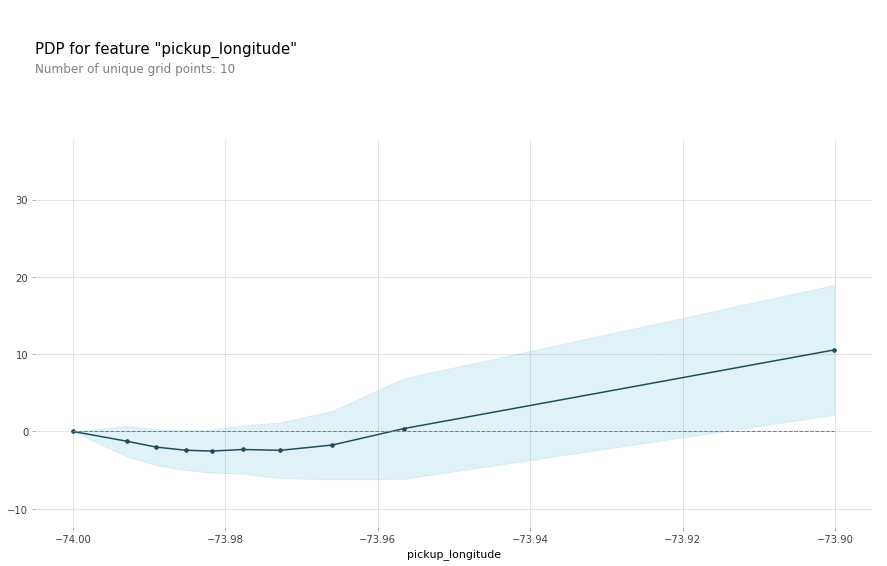

In [3]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Why does the partial dependence plot have this U-shape?

Does your explanation suggest what shape to expect in the partial dependence plots for the other features?

Create all other partial plots in a for-loop below (copying the appropriate lines from the code above).

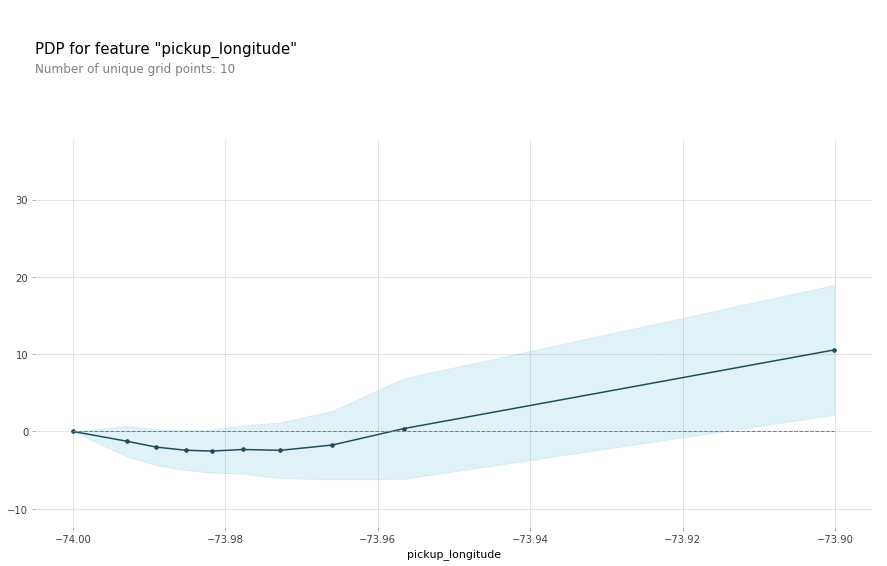

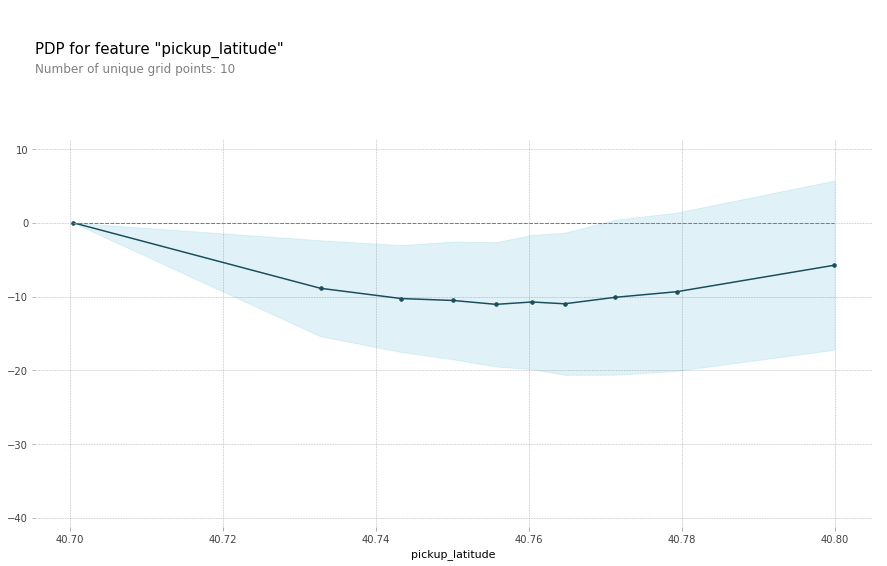

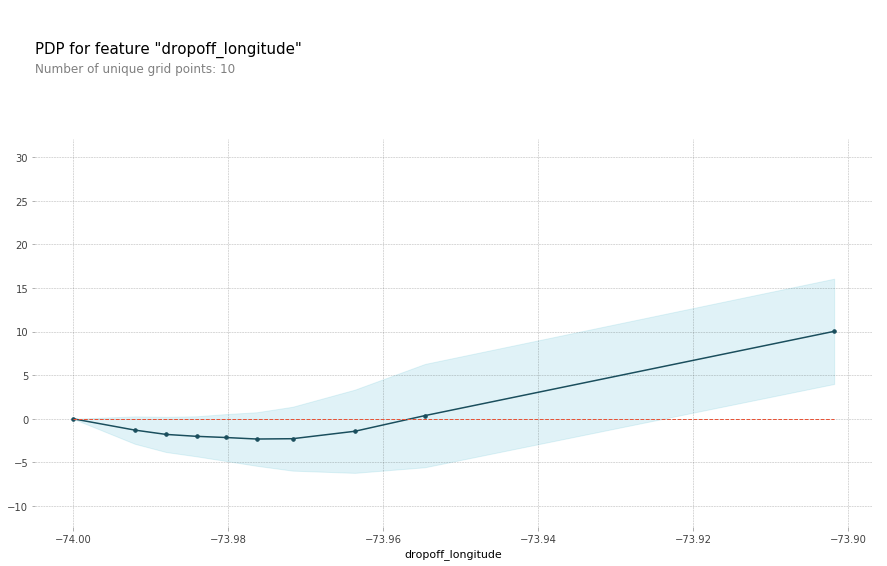

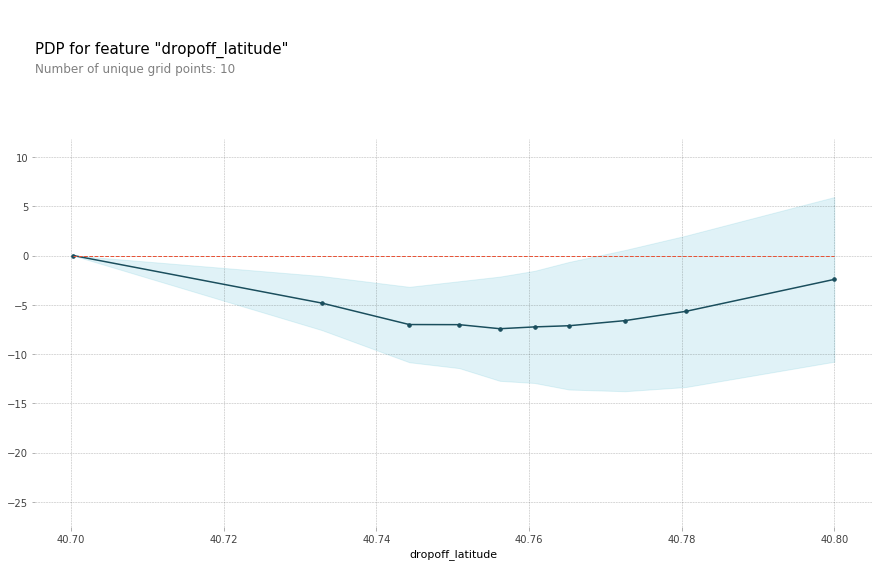

In [4]:
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

Do the shapes match your expectations for what shapes they would have? Can you explain the shape now that you've seen them? 

Uncomment the following line to check your intuition.

In [5]:
q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
The code is

    for feat_name in base_features:
        pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X,
                                   model_features=base_features, feature=feat_name)
        pdp.pdp_plot(pdp_dist, feat_name)
        plt.show()


We have a sense from the permutation importance results that distance is the most important determinant of taxi fare.

This model didn't include distance measures (like absolute change in latitude or longitude) as features, so coordinate features (like `pickup_longitude`) capture the effect of distance.
Being picked up near the center of the longitude values lowers predicted fares on average, because it means shorter trips (on average).

For the same reason, we see the general U-shape in all our partial dependence plots.


## Q2

Now you will run a 2D partial dependence plot.  As a reminder, here is the code from the tutorial.  

```
inter1  =  pdp.pdp_interact(model=my_model, dataset=val_X, model_features=feature_names, features=['Goal Scored', 'Distance Covered (Kms)'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Goal Scored', 'Distance Covered (Kms)'], plot_type='contour')
plt.show()
```

Create a 2D plot for the features `pickup_longitude` and `dropoff_longitude`.  Plot it appropriately?

What do you expect it to look like?

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f4ad4098c18>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f4ad4031978>})

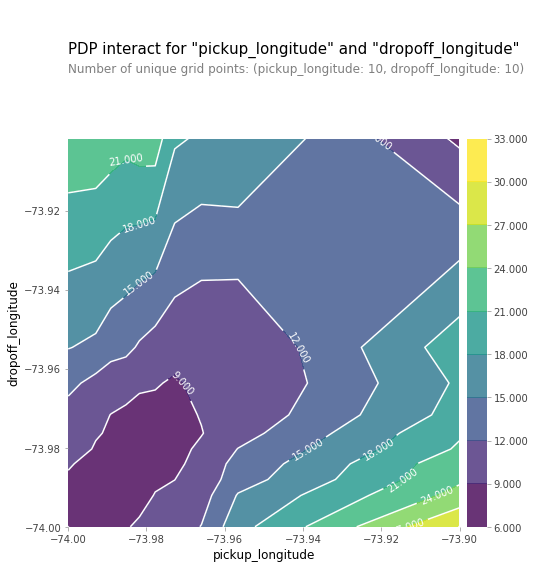

In [6]:
# Add your code here
inter1 = pdp.pdp_interact(model = first_model, dataset = val_X, model_features = base_features, 
                          features = ["pickup_longitude", "dropoff_longitude"])
pdp.pdp_interact_plot(pdp_interact_out = inter1, feature_names = ["pickup_longitude", "dropoff_longitude"], plot_type = "contour")

Uncomment the line below to see the solution and explanation for how one might reason about the plot shape.

In [7]:
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
You should expect the plot to have contours running along a diagonal. We see that to some extent, though there are interesting caveats.

We expect the diagonal contours because these are pairs of values where the pickup and dropoff longitudes are nearby, indicating shorter trips (controlling for other factors).

As you get further from the central diagonal, we should expect prices to increase as the distances between the pickup and dropoff longitudes also increase.

The surprising feature is that prices increase as you go further to the upper-right of this graph, even staying near that 45-degree line.

This could be worth further investigation, though the effect of moving to the upper right of this graph is small compared to moving away from that 45-degree line.

The code you need to create the desired plot is:

    fnames = ['pickup_longitude', 'dropoff_longitude']
    longitudes_partial_plot  =  pdp.pdp_interact(model=first_model, dataset=val_X,
                                                model_features=base_features, features=fnames)
    pdp.pdp_interact_plot(pdp_interact_out=longitudes_partial_plot,
                          feature_names=fnames, plot_type='contour')
    plt.show()


## Question 3
Consider a ride starting at longitude -73.92 and ending at longitude -74. Using the graph from the last question, estimate how much money the rider would have saved if they'd started the ride at longitude -73.98 instead?

In [8]:
savings_from_shorter_trip = 16

q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

About \$15. The price decreases from slightly more than \$24 to slightly more than \$9.

For a solution or hint, uncomment the appropriate line below.

In [9]:
# q_3.hint()
q_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> About \$15. The price decreases from slightly more than \$24 to slightly more than \$9.

## Question 4
In the PDP's you've seen so far, location features have primarily served as a proxy to capture distance traveled. In the permutation importance lessons, you added the features `abs_lon_change` and `abs_lat_change` as a more direct measure of distance.

Create these features again here. You only need to fill in the top two lines.  Then run the following cell.  

**After you run it, identify the most important difference between this partial dependence plot and the one you got without absolute value features. The code to generate the PDP without absolute value features is at the top of this code cell.**

---

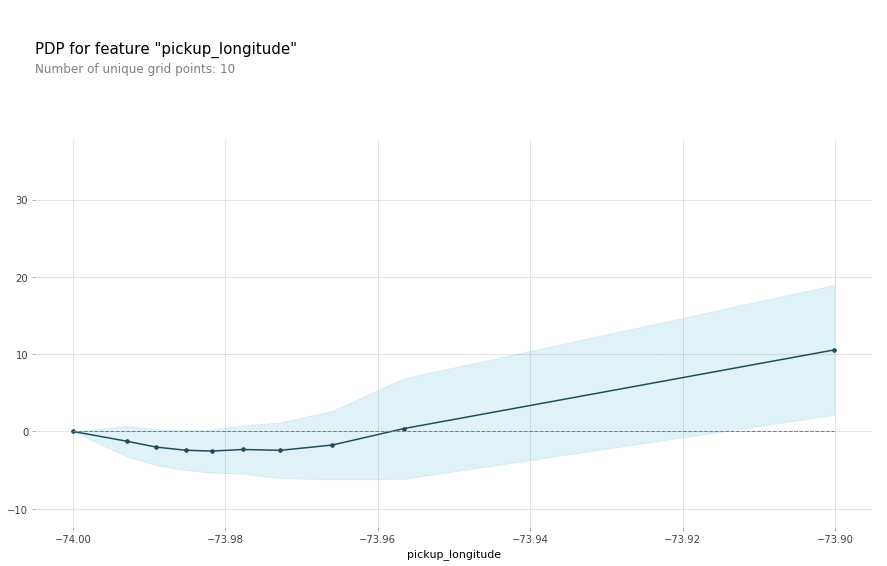

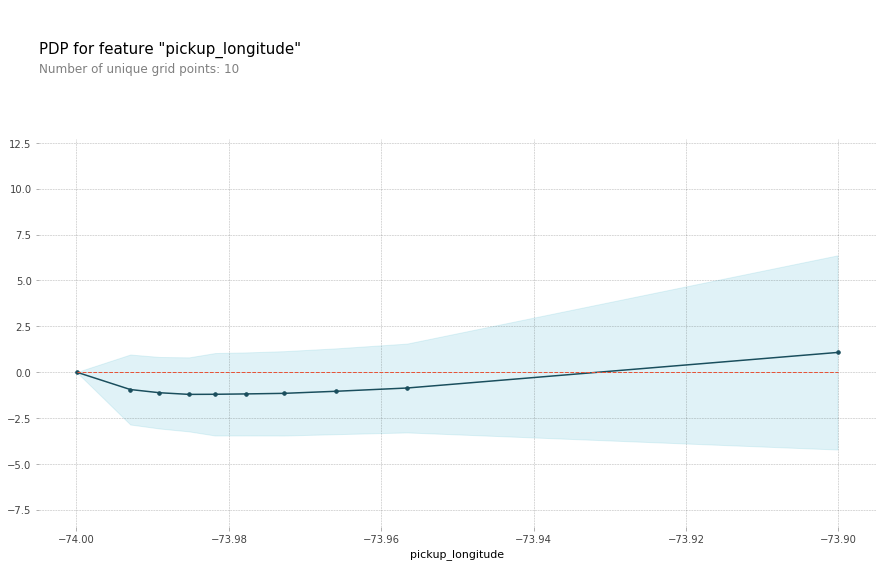

In [10]:
# This is the PDP for pickup_longitude without the absolute difference features. Included here to help compare it to the new PDP you create
feat_name = 'pickup_longitude'
pdp_dist_original = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist_original, feat_name)
plt.show()



# create new features
data['abs_lon_change'] = abs(data["pickup_longitude"] - data["dropoff_longitude"])
data['abs_lat_change'] = abs(data["pickup_latitude"] - data["dropoff_latitude"])

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=second_model, dataset=new_val_X, model_features=features_2, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [11]:
# q_4.check()

Uncomment the lines below to see a hint or the solution (including an explanation of the important differences between the plots).

In [12]:
# q_4.hint()
q_4.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
The biggest difference is that the partial dependence plot became much smaller. The the lowest vertical value is about $15 below the highest vertical value in the top chart, whereas this difference is only about $3 in the chart you just created. In other words, once you control for absolute distance traveled, the pickup_longitude has only a very small impact on predictions.

    # create new features
    data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
    data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)


## Question 5
Consider a scenario where you have only 2 predictive features, which we will call `feat_A` and `feat_B`. Both features have minimum values of -1 and maximum values of 1.  The partial dependence plot for `feat_A` increases steeply over its whole range, whereas the partial dependence plot for feature B increases at a slower rate (less steeply) over its whole range.

Does this guarantee that `feat_A` will have a higher permutation importance than `feat_B`.  Why or why not?

After you've thought about it, uncomment the line below for the solution.

In [13]:
q_5.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> No. This doesn't guarantee `feat_a` is more important. For example, `feat_a` could have a big effect in the cases where it varies, but could have a single value 99\% of the time. In that case, permuting `feat_a` wouldn't matter much, since most values would be unchanged.

## Q6
The code cell below does the following:

1. Creates two features, `X1` and `X2`, having random values in the range [-2, 2].
2. Creates a target variable `y`, which is always 1.
3. Trains a `RandomForestRegressor` model to predict `y` given `X1` and `X2`.
4. Creates a PDP plot for `X1` and a scatter plot of `X1` vs. `y`.

Do you have a prediction about what the PDP plot will look like? Run the cell to find out.

Modify the initialization of `y` so that our PDP plot has a positive slope in the range [-1,1], and a negative slope everywhere else. (Note: *you should only modify the creation of `y`, leaving `X1`, `X2`, and `my_model` unchanged.*)

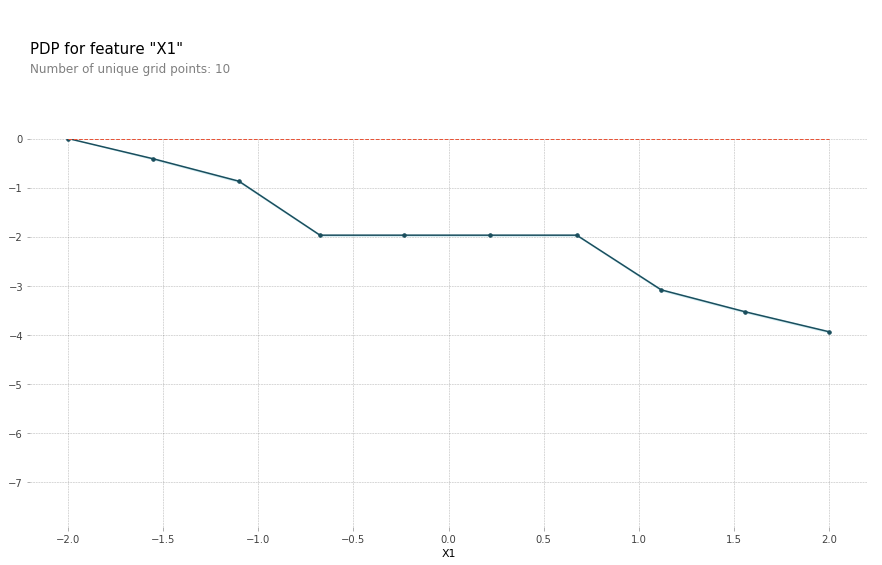

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [14]:
from numpy.random import rand
import numpy as np

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2

# Create y. you should have X1 and X2 in the expression for y
# y = np.ones(n_samples)
y = -X1*(X1 < -1) - X1*(X1 > 1) + X2

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')

# visualize your results
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

q_6.check()

Uncomment the lines below for a hint or solution

In [15]:
# q_6.hint()
q_6.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# There are many possible solutions.
# One example expression for y is.
y = -2 * X1 * (X1<-1) + X1 - 2 * X1 * (X1>1) - X2
# You don't need any more changes

```

## Question 7
Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high.  We will use a RandomForest for the model.

*Note: You only need to supply the lines that create the variables X1, X2 and y. The code to build the model and calculate insights is provided*.

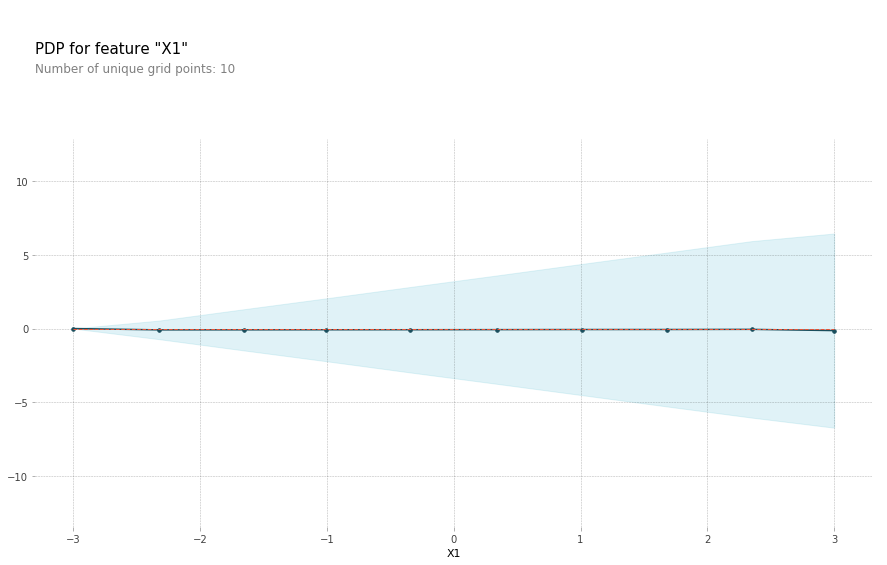

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Weight,Feature
1.9993 ± 0.0358,X1
1.9971 ± 0.0324,X2


In [16]:
import eli5
from eli5.sklearn import PermutationImportance

n_samples = 20000

# Create array holding predictive feature
X1 = 6*np.random.rand(n_samples) - 3
X2 = 4*np.random.rand(n_samples) - 2
# Create y. you should have X1 and X2 in the expression for y
y = X1*X2


# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)

q_7.check()

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm, feature_names = ['X1', 'X2'])

In [17]:
# Uncomment the following lines for the hint or solution
# q_7.hint()
q_7.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X in the expression for y
y = X1 * X2

# Aside from these lines, use the code provided

```

## Congrats

Partial dependence plots can be really interesting. We have a [discussion thread](https://www.kaggle.com/learn-forum/65782) to talk about what real-world topics or questions you'd be curious to see addressed with partial dependence plots. 

Next up is **SHAP values** which help you understand the logic for each individual prediction.